# ChatGPT Playbook

<p>
Mal Minhas, v1.2<br>
21.01.24
</p>

<p>
<h4>Versions</h4>
<ul>
<li><b>v1.0</b>: 01.03.23. First version</li>
<li><b>v1.1</b>: 18.08.23. Updated for latest OpenAI update</li>
<li><b>v1.2</b>: 21.01.24. Updated for Python 3.12</li>    
</ul>
</p>

## 1. Installation

This notebook leverages a the newly announced ChatGPT API which you can find out more about in the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis).  It's been updated over time as OpenAI's `openai` has changed.

In order to use ChatGPT API you will need OpenAI API access.  For that you will need both an API key and an Organization ID for authentication.  You can obtain an API key from your [API Keys page](https://beta.openai.com/account/api-keys).  Organization IDs can be found on your [Organization settings](https://beta.openai.com/account/org-settings) page. The module assumes your API key and Organization ID have been stored in two respective environment variables `OPENAI_API_KEY` and `OPENAI_ORG_ID`.

In [1]:
import os

def configureEnvVars(key, org_id):
    # NB: host url is not prepended with \"https\" nor does it have a trailing slash.
    os.environ['OPENAI_API_KEY'] = key
    os.environ['OPENAI_ORG_ID'] = org_id

def getOrganisationId(file):
    with open(file) as f:
        key = f.read()
    return key
    
def getAPIKey(file):
    with open(file) as f:
        key = f.read()
    return key

configureEnvVars(getAPIKey('.openAIKey'),getOrganisationId('.openAIOrg'))

In [2]:
import os
import openai

openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
models = client.models.list()
names = []
for model in models.data:
    names.append(model.id)
print(names)

['curie-search-query', 'babbage-search-query', 'dall-e-3', 'babbage-search-document', 'dall-e-2', 'gpt-3.5-turbo-0301', 'text-embedding-ada-002', 'davinci-search-query', 'tts-1-hd-1106', 'gpt-4-0613', 'tts-1-hd', 'gpt-4', 'ada-search-document', 'ada-code-search-code', 'davinci-002', 'babbage-002', 'gpt-4-vision-preview', 'davinci-search-document', 'curie-search-document', 'whisper-1', 'ada-search-query', 'ada-code-search-text', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-16k-0613', 'gpt-3.5-turbo-16k', 'gpt-3.5-turbo', 'gpt-3.5-turbo-0613', 'gpt-3.5-turbo-instruct', 'gpt-3.5-turbo-instruct-0914', 'gpt-4-1106-preview', 'tts-1-1106', 'tts-1']


Note the presence of `gpt-3.5`.  This is the model for ChatGPT per the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis):

In [3]:
[name for name in names if name.find('gpt') == 0]

['gpt-3.5-turbo-0301',
 'gpt-4-0613',
 'gpt-4',
 'gpt-4-vision-preview',
 'gpt-3.5-turbo-1106',
 'gpt-3.5-turbo-16k-0613',
 'gpt-3.5-turbo-16k',
 'gpt-3.5-turbo',
 'gpt-3.5-turbo-0613',
 'gpt-3.5-turbo-instruct',
 'gpt-3.5-turbo-instruct-0914',
 'gpt-4-1106-preview']

## 2. Usage

Here's the most basic invocation of the API:

In [4]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "Tell the world about the ChatGPT API in the style of a pirate."}],
  temperature=0.7
)

Let's see what a `completion` instance is and then print it out:

In [5]:
print(type(completion))
print(dir(completion))

<class 'openai.types.chat.chat_completion.ChatCompletion'>
['__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__repr__', 

Let's dump `to_dict()`:

In [6]:
import pprint
pprint.pprint(completion.model_dump_json())

('{"id":"chatcmpl-8jZZAPCbAlvCYoUHHcQUXForzrNWa","choices":[{"finish_reason":"stop","index":0,"logprobs":null,"message":{"content":"Ahoy, '
 "me hearties! Gather 'round and listen closely, for I have a tale to share "
 'about the ChatGPT API, arrr!\\n\\nAvast ye! The ChatGPT API be a magnificent '
 'treasure, a power that be harnessed to interact with the wondrous ChatGPT '
 'model. With this API, ye can bring the essence of ChatGPT to yer own '
 'applications, websites, or even yer own software creations. It be like '
 "havin' yer very own parrot that be speakin' like a true gentleman o' "
 "fortune!\\n\\nNow, ye may be wonderin' what makes this ChatGPT API so "
 "special, aye? Well, buckle up, me hearties! This API be capable of holdin' "
 'engaging conversations with ye users. It be a language model trained on vast '
 "amounts o' text, learnin' the intricacies o' human speech. It can answer "
 'questions, provide explanations, or simply have a jolly chat with ye, just '
 "like a tru

We can see the output is in the `content` field.  Let's write some utility functions to render code output in Markdown:

In [7]:
from IPython.display import display, Markdown

def renderMe(text):
    display(Markdown(text))

def completeMe(text):
    completion = client.chat.completions.create(
        model = 'gpt-3.5-turbo', 
        messages = [{'role': 'user', 'content': text}]
    )
    return completion.choices[0].message.content.strip()

In [8]:
renderMe(completeMe("Write and execute Python code to draw a Mandelbrot set using matplotlib."))

Sure! Here's a Python code to draw a Mandelbrot set using matplotlib:

```python
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

def draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter):
    pixels = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x_min + (x / float(width)) * (x_max - x_min)
            imaginary = y_min + (y / float(height)) * (y_max - y_min)
            c = complex(real, imaginary)
            pixels[x, y] = mandelbrot(c, max_iter)

    plt.imshow(pixels.T, cmap='hot', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Mandelbrot Set')
    plt.show()

# Set the parameters for the plot
width = 800
height = 800
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iter = 100

# Call the function to draw the Mandelbrot set
draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter)
```

This code defines two functions: `mandelbrot` and `draw_mandelbrot`. The `mandelbrot` function determines the number of iterations required for a given complex number `c` to escape the Mandelbrot set. The `draw_mandelbrot` function creates a 2D array of the Mandelbrot set and plots it using matplotlib.

You can adjust the parameters `width`, `height`, `x_min`, `x_max`, `y_min`, `y_max`, and `max_iter` to customize the plot according to your preference.

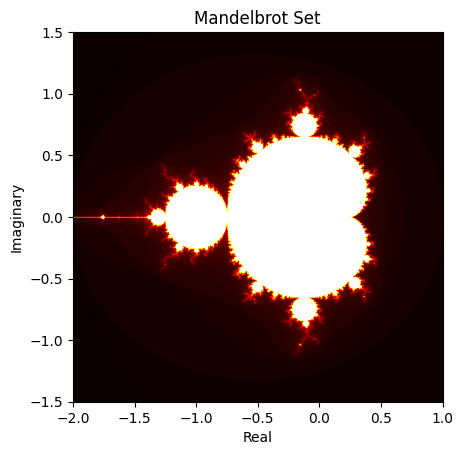

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

def draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter):
    pixels = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x_min + (x / float(width)) * (x_max - x_min)
            imaginary = y_min + (y / float(height)) * (y_max - y_min)
            c = complex(real, imaginary)
            pixels[x, y] = mandelbrot(c, max_iter)

    plt.imshow(pixels.T, cmap='hot', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Mandelbrot Set')
    plt.show()

# Set the parameters for the plot
width = 800
height = 800
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iter = 100

# Call the function to draw the Mandelbrot set
draw_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter)